### Goal:

Imagine that your data has a problem with 

1. heteroscedasticity and 
2. multivariate normality. 

What can you do to fix it?

#### Translating the Above:

The errors are clustered around a certain portion of the data: the density of the residuals is not normally distributed. How do you fix this?

In [4]:
# copying and pasting the preliminary cells from the Thinkful page

import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [5]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


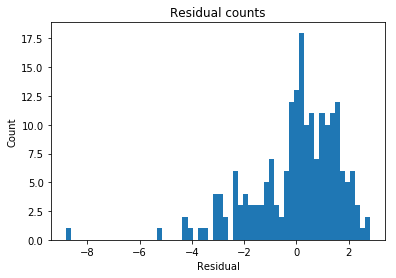

In [10]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the residual.
residual = actual - predicted

# Check for density distribution of the residuals.
plt.hist(residual, bins=60)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [29]:
import statsmodels.api as sm
from sklearn import linear_model
# graph out individual features to see which one is the problem:

# for feature: tv

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

print_model = model.summary()

print(print_model)


#plt.scatter(X, actual, color='black')
#plt.plot(X, predicted, color='blue', linewidth=1)
#plt.show()

Intercept: 
 [2.93888937]
Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Mon, 21 Jan 2019   Prob (F-statistic):          2.43e-171
Time:                        11:27:52   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

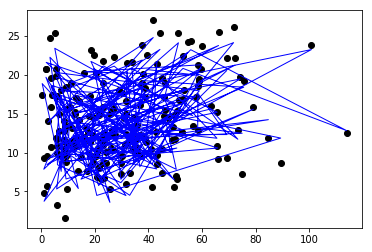

In [23]:
# I'm........gonna' come back to you

# for feature newspaper
plt.scatter(X['Newspaper'], actual, color='black')
plt.plot(X['Newspaper'], predicted, color='blue', linewidth=1)
plt.show()

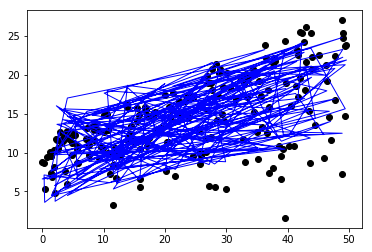

In [25]:
# for feature radio
plt.scatter(X['Radio'], actual, color='black')
plt.plot(X['Radio'], predicted, color='blue', linewidth=1)
plt.show()

In [1]:
# welp, based on intuition and the .api output, 
# the newspaper category is not normally distributed

#sooooooooooo how to fix?



In [2]:
# goal to fix lack of normality and heteroskedasticity: 
# 1. linearize the features and 
# 2. normalize the outcome variable

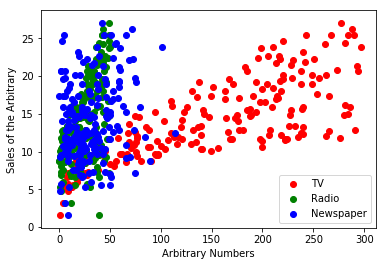

In [16]:
plt.scatter(x=data.TV, y=data.Sales, color='red')
plt.scatter(x=data.Radio, y=data.Sales, color='green')
plt.scatter(x=data.Newspaper, y=data.Sales, color='blue')

plt.legend(['TV', 'Radio', 'Newspaper'])

plt.xlabel('Arbitrary Numbers')
plt.ylabel('Sales of the Arbitrary')

plt.show()

In [49]:
# Newspaper curves a lot - try to box-cox it somehow.

data['TVFixed'] = data.TV ** (1/3)

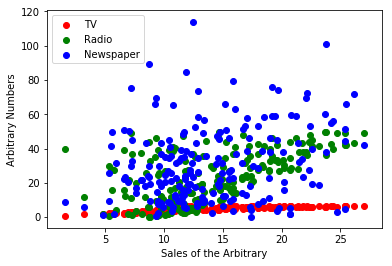

In [51]:
plt.scatter(y=data.TVFixed, x=data.Sales, color='red')
plt.scatter(y=data.Radio, x=data.Sales, color='green')
plt.scatter(y=data.Newspaper, x=data.Sales, color='blue')

plt.legend(['TV', 'Radio', 'Newspaper'])

plt.ylabel('Arbitrary Numbers')
plt.xlabel('Sales of the Arbitrary')

plt.show()

In [53]:
# meh fixed one thing. Let's check back with my good old pal, the y variable
X = data[['TVFixed','Radio','Newspaper']]
regr.fit(X, Y)
predicted = regr.predict(X).ravel()
actual = data['Sales']

residual = actual - predicted

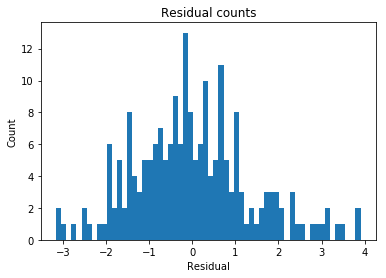

In [54]:

plt.hist(residual, bins=60)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [ ]:
# I did it. I freakin' did it. Normalized residuals. Ugh
# FEELS SO OOOOO GOOD!